In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# Leemos el archivo csv con las muestras de sedimentos de corrientes de las hojas 250k
data = pd.read_csv('Datos250k.csv')

pd.set_option('display.max_columns', 999)
data.head()

,FID,tipo_muestra,codigo_muestra,fraccion,metodo,ag_ppm,al_porciento,as_ppm,au_ppb,ba_ppm,be_ppm,bi_ppm,br_ppm,ca_porciento,cd_ppm,ce_ppm,co_ppm,cr_ppm,cs_ppm,cu_ppm,eu_ppm,fe_porciento,ga_ppm,ge_ppm,hf_ppm,hg_ppm,in_ppm,ir_ppb,k_porciento,la_ppm,li_ppm,lu_ppm,mg_porciento,mn_ppm,mo_ppm,na_porciento,nb_ppm,nd_ppm,ni_ppm,p_ppm,pb_ppm,rb_ppm,s_porciento,sb_ppm,sc_ppm,se_ppm,sm_ppm,sn_ppm,sr_ppm,ta_ppm,tb_ppm,te_ppm,th_ppm,ti_porciento,ti_ppm,u_ppm,v_ppm,w_ppm,y_ppm,yb_ppm,zn_ppm,zr_ppm,shape
0,e250K.MuestraGeoqMu.1,NaN,MAL2056,NaN,NaN,0.9,7.59,22.0,-2.0,401.0,4.0,-5.0,3.3,1.55,-1.0,190.0,8.0,39.0,11.0,11.0,0.8,3.62,NaN,NaN,15.0,-1.0,NaN,-5.0,2.11,76.0,NaN,1.40,0.58,668.0,-1.0,2.23,NaN,67.0,9.0,700.0,27.0,220.0,NaN,1.2,18.3,-3.0,17.7,-10.0,237.5,2.1,2.5,NaN,38.8,0.36,NaN,13.0,95.0,3.0,39.3,7.8,92.9,NaN,POINT (-69.40184421699996 -29.250006886999984)
1,e250K.MuestraGeoqMu.2,NaN,MAL1869,NaN,NaN,0.7,6.15,106.0,-2.0,637.0,2.0,-5.0,-0.5,1.80,1.0,84.0,29.0,52.0,25.0,35.8,1.5,14.96,NaN,NaN,19.0,-1.0,NaN,-5.0,1.68,30.3,NaN,0.57,0.73,2270.0,2.0,1.44,NaN,40.0,17.0,1300.0,71.0,95.0,NaN,7.8,13.0,-3.0,7.2,-10.0,263.0,2.3,1.2,NaN,12.0,1.24,NaN,4.2,436.0,3.0,20.5,3.3,235.0,NaN,POINT (-69.79118755099995 -29.79338960299998)
2,e250K.MuestraGeoqMu.3,NaN,MAL1803,NaN,NaN,0.6,8.34,98.1,8.0,554.0,2.0,-5.0,0.8,1.96,-1.0,120.0,16.0,43.0,12.0,30.9,1.2,6.34,NaN,NaN,13.0,-1.0,NaN,-5.0,2.09,35.3,NaN,0.38,0.80,1130.0,2.0,2.28,NaN,51.0,15.0,800.0,44.0,110.0,NaN,5.1,13.3,-3.0,7.0,-10.0,417.0,1.4,0.6,NaN,18.0,0.50,NaN,3.9,191.0,2.0,17.4,2.5,135.0,NaN,POINT (-69.68360647999998 -29.96360794499998)
3,e250K.MuestraGeoqMu.4,NaN,MAL2119,NaN,NaN,0.8,7.90,16.0,-2.0,412.0,2.0,-5.0,-0.5,2.32,-1.0,68.0,16.0,78.0,7.0,52.6,1.2,4.14,NaN,NaN,7.0,-1.0,NaN,-5.0,1.95,28.8,NaN,0.46,1.30,658.0,-1.0,1.14,NaN,30.0,30.0,700.0,16.0,95.0,NaN,1.3,17.5,-3.0,6.6,-10.0,296.3,-0.5,1.0,NaN,12.0,0.40,NaN,3.8,131.0,-1.0,18.7,3.2,71.6,NaN,POINT (-69.07579898499995 -29.22700500899998)
4,e250K.MuestraGeoqMu.5,NaN,MAL1888,NaN,NaN,0.5,8.01,28.0,-2.0,522.0,2.0,-5.0,-0.5,1.70,-1.0,64.0,12.0,26.0,6.0,26.5,1.2,3.95,NaN,NaN,6.8,-1.0,NaN,-5.0,2.02,28.6,NaN,0.34,1.13,940.0,1.0,2.36,NaN,32.0,12.0,900.0,29.0,100.0,NaN,1.8,10.2,-3.0,5.0,-10.0,396.0,1.0,0.6,NaN,10.0,0.43,NaN,2.4,123.0,-1.0,14.7,2.0,102.0,NaN,POINT (-69.80677373499998 -29.40986802599997)


In [3]:
data.shape # ¿Cuántos datos tenemos?

(38359, 63)

In [4]:
data.columns # Vemos qué variables contienen las columnas

Index(['FID', 'tipo_muestra', 'codigo_muestra', 'fraccion', 'metodo', 'ag_ppm',
       'al_porciento', 'as_ppm', 'au_ppb', 'ba_ppm', 'be_ppm', 'bi_ppm',
       'br_ppm', 'ca_porciento', 'cd_ppm', 'ce_ppm', 'co_ppm', 'cr_ppm',
       'cs_ppm', 'cu_ppm', 'eu_ppm', 'fe_porciento', 'ga_ppm', 'ge_ppm',
       'hf_ppm', 'hg_ppm', 'in_ppm', 'ir_ppb', 'k_porciento', 'la_ppm',
       'li_ppm', 'lu_ppm', 'mg_porciento', 'mn_ppm', 'mo_ppm', 'na_porciento',
       'nb_ppm', 'nd_ppm', 'ni_ppm', 'p_ppm', 'pb_ppm', 'rb_ppm',
       's_porciento', 'sb_ppm', 'sc_ppm', 'se_ppm', 'sm_ppm', 'sn_ppm',
       'sr_ppm', 'ta_ppm', 'tb_ppm', 'te_ppm', 'th_ppm', 'ti_porciento',
       'ti_ppm', 'u_ppm', 'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm',
       'zr_ppm', 'shape'],
      dtype='object')

In [5]:
data.dtypes # Verificamos el tipo de datos que contiene cada campo

FID                object
tipo_muestra       object
codigo_muestra     object
fraccion           object
metodo             object
                   ...   
y_ppm             float64
yb_ppm            float64
zn_ppm            float64
zr_ppm            float64
shape              object
Length: 63, dtype: object

In [6]:
data.isnull().sum() # Vemos si hay campos vacíos

FID                   0
tipo_muestra        306
codigo_muestra        0
fraccion            306
metodo              712
                  ...  
y_ppm                10
yb_ppm             1087
zn_ppm               24
zr_ppm            36378
shape              1224
Length: 63, dtype: int64

In [7]:
# Vamos a eliminar todos los datos excepto los contenidos de REE, etiquetas de muestras y coordenadas
data.drop(['FID', 'tipo_muestra', 'fraccion', 'metodo', 'ag_ppm', 'al_porciento', 'as_ppm'], axis=1, inplace=True)
data.drop(['au_ppb', 'ba_ppm', 'be_ppm', 'bi_ppm', 'br_ppm', 'ca_porciento', 'cd_ppm', 'co_ppm'], axis=1, inplace=True)
data.drop(['cr_ppm', 'cs_ppm', 'cu_ppm', 'fe_porciento', 'ga_ppm', 'ge_ppm', 'hf_ppm', 'hg_ppm'], axis=1, inplace=True)
data.drop(['in_ppm', 'ir_ppb', 'k_porciento', 'li_ppm', 'mg_porciento', 'mn_ppm', 'mo_ppm', 'na_porciento'], axis=1, inplace=True)
data.drop(['nb_ppm', 'ni_ppm', 'p_ppm', 'pb_ppm', 'rb_ppm', 's_porciento', 'sb_ppm', 'se_ppm'], axis=1, inplace=True)
data.drop(['sn_ppm', 'sr_ppm', 'ta_ppm', 'te_ppm', 'th_ppm', 'ti_porciento', 'ti_ppm', 'u_ppm'], axis=1, inplace=True)
data.drop(['v_ppm', 'w_ppm', 'zn_ppm', 'zr_ppm'], axis=1, inplace=True)
data.head()

,codigo_muestra,ce_ppm,eu_ppm,la_ppm,lu_ppm,nd_ppm,sc_ppm,sm_ppm,tb_ppm,y_ppm,yb_ppm,shape
0,MAL2056,190.0,0.8,76.0,1.40,67.0,18.3,17.7,2.5,39.3,7.8,POINT (-69.40184421699996 -29.250006886999984)
1,MAL1869,84.0,1.5,30.3,0.57,40.0,13.0,7.2,1.2,20.5,3.3,POINT (-69.79118755099995 -29.79338960299998)
2,MAL1803,120.0,1.2,35.3,0.38,51.0,13.3,7.0,0.6,17.4,2.5,POINT (-69.68360647999998 -29.96360794499998)
3,MAL2119,68.0,1.2,28.8,0.46,30.0,17.5,6.6,1.0,18.7,3.2,POINT (-69.07579898499995 -29.22700500899998)
4,MAL1888,64.0,1.2,28.6,0.34,32.0,10.2,5.0,0.6,14.7,2.0,POINT (-69.80677373499998 -29.40986802599997)


In [8]:
# Creamos una columna sumando todos los valores de REE
data['REE_ppm'] = data.ce_ppm + data.eu_ppm + data.la_ppm + data.lu_ppm + data.nd_ppm + data.sc_ppm + data.sm_ppm + data.tb_ppm + data.y_ppm + data.yb_ppm
data.head()

,codigo_muestra,ce_ppm,eu_ppm,la_ppm,lu_ppm,nd_ppm,sc_ppm,sm_ppm,tb_ppm,y_ppm,yb_ppm,shape,REE_ppm
0,MAL2056,190.0,0.8,76.0,1.40,67.0,18.3,17.7,2.5,39.3,7.8,POINT (-69.40184421699996 -29.250006886999984),420.80
1,MAL1869,84.0,1.5,30.3,0.57,40.0,13.0,7.2,1.2,20.5,3.3,POINT (-69.79118755099995 -29.79338960299998),201.57
2,MAL1803,120.0,1.2,35.3,0.38,51.0,13.3,7.0,0.6,17.4,2.5,POINT (-69.68360647999998 -29.96360794499998),248.68
3,MAL2119,68.0,1.2,28.8,0.46,30.0,17.5,6.6,1.0,18.7,3.2,POINT (-69.07579898499995 -29.22700500899998),175.46
4,MAL1888,64.0,1.2,28.6,0.34,32.0,10.2,5.0,0.6,14.7,2.0,POINT (-69.80677373499998 -29.40986802599997),158.64


In [9]:
# Filtramos aquellas muestras que tienen más de 1200 ppm (umbral de la anomalía)
anomalias = data[data['REE_ppm'] > 1200]
anomalias.head()

,codigo_muestra,ce_ppm,eu_ppm,la_ppm,lu_ppm,nd_ppm,sc_ppm,sm_ppm,tb_ppm,y_ppm,yb_ppm,shape,REE_ppm
114,MAL2054,586.00,1.50,277.1,3.20,180.0,21.8,49.7,7.10,86.0,17.0,POINT (-69.39859427499994 -29.255700782999952),1229.40
826,MO20967,618.61,3.03,276.4,1.53,274.0,32.9,48.6,6.00,113.2,11.2,POINT (-66.03489684899995 -32.81920577699998),1385.47
939,MO20922,644.61,5.80,355.8,0.85,345.9,18.0,61.1,6.27,89.4,6.8,POINT (-66.22369672899998 -32.56111618299997),1534.53
1195,SL21187,1000.00,8.17,545.1,1.89,570.2,36.5,113.3,11.52,158.9,15.9,POINT (-66.06835016399998 -33.02526794399995),2461.48
1297,MO20975,1000.00,3.35,563.1,1.62,561.3,34.1,95.9,10.21,146.1,11.8,POINT (-66.06029430099994 -32.936107092999976),2427.48


In [10]:
anomalias.shape # ¿Cuántos datos de anomalías tenemos?

(156, 13)

In [11]:
anomalias.isnull().sum() # ¿Hay algún valor nulo?

codigo_muestra    0
ce_ppm            0
eu_ppm            0
la_ppm            0
lu_ppm            0
nd_ppm            0
sc_ppm            0
sm_ppm            0
tb_ppm            0
y_ppm             0
yb_ppm            0
shape             4
REE_ppm           0
dtype: int64

In [12]:
anomalias.dropna(subset=['shape']) # Eliminamos las muestras qe carecen de coordenadas

,codigo_muestra,ce_ppm,eu_ppm,la_ppm,lu_ppm,nd_ppm,sc_ppm,sm_ppm,tb_ppm,y_ppm,yb_ppm,shape,REE_ppm
114,MAL2054,586.00,1.50,277.1,3.20,180.0,21.8,49.7,7.10,86.0,17.0,POINT (-69.39859427499994 -29.255700782999952),1229.40
826,MO20967,618.61,3.03,276.4,1.53,274.0,32.9,48.6,6.00,113.2,11.2,POINT (-66.03489684899995 -32.81920577699998),1385.47
939,MO20922,644.61,5.80,355.8,0.85,345.9,18.0,61.1,6.27,89.4,6.8,POINT (-66.22369672899998 -32.56111618299997),1534.53
1195,SL21187,1000.00,8.17,545.1,1.89,570.2,36.5,113.3,11.52,158.9,15.9,POINT (-66.06835016399998 -33.02526794399995),2461.48
1297,MO20975,1000.00,3.35,563.1,1.62,561.3,34.1,95.9,10.21,146.1,11.8,POINT (-66.06029430099994 -32.936107092999976),2427.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37402,SR27266,1400.00,5.30,695.0,8.32,592.0,14.7,115.0,22.00,199.0,60.4,POINT (-65.66674764199996 -32.70547050799996),3111.72
37486,39596PN,550.00,5.00,243.0,3.88,272.0,31.1,46.0,15.20,140.0,24.4,POINT (-63.62811664099996 -29.515665274999947),1330.58
37550,LQ10812,686.00,5.40,355.0,1.19,181.0,12.8,37.0,3.00,26.4,3.8,POINT (-65.94507863099994 -21.937889643999938),1311.59
37789,LQ10791,631.00,7.30,301.0,0.67,300.0,13.0,45.6,4.00,20.3,2.0,POINT (-65.82817241699996 -22.303775642999938),1324.87


In [13]:
# Vamos a trabajar con las anomalías, ubicándolas en un mapa
# Tomamos la columna 'shape' con las coordenadas y la separamos en latitud y longitud
anomalias['longitud'] = anomalias['shape'].str.extract(r'(\S-\d+.\d+)', expand = True)
anomalias['longitud'] = anomalias['longitud'].replace({'\S-':'-'}, regex=True)
anomalias['latitud'] = anomalias['shape'].str.extract(r'(\s-\d+.\d+)', expand = True)
anomalias.head()

<ipython-input-13-d4d548f47320>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalias['longitud'] = anomalias['shape'].str.extract(r'(\S-\d+.\d+)', expand = True)
<ipython-input-13-d4d548f47320>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalias['longitud'] = anomalias['longitud'].replace({'\S-':'-'}, regex=True)
<ipython-input-13-d4d548f47320>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,codigo_muestra,ce_ppm,eu_ppm,la_ppm,lu_ppm,nd_ppm,sc_ppm,sm_ppm,tb_ppm,y_ppm,yb_ppm,shape,REE_ppm,longitud,latitud
114,MAL2054,586.00,1.50,277.1,3.20,180.0,21.8,49.7,7.10,86.0,17.0,POINT (-69.39859427499994 -29.255700782999952),1229.40,-69.39859427499994,-29.255700782999952
826,MO20967,618.61,3.03,276.4,1.53,274.0,32.9,48.6,6.00,113.2,11.2,POINT (-66.03489684899995 -32.81920577699998),1385.47,-66.03489684899995,-32.81920577699998
939,MO20922,644.61,5.80,355.8,0.85,345.9,18.0,61.1,6.27,89.4,6.8,POINT (-66.22369672899998 -32.56111618299997),1534.53,-66.22369672899998,-32.56111618299997
1195,SL21187,1000.00,8.17,545.1,1.89,570.2,36.5,113.3,11.52,158.9,15.9,POINT (-66.06835016399998 -33.02526794399995),2461.48,-66.06835016399998,-33.02526794399995
1297,MO20975,1000.00,3.35,563.1,1.62,561.3,34.1,95.9,10.21,146.1,11.8,POINT (-66.06029430099994 -32.936107092999976),2427.48,-66.06029430099994,-32.936107092999976


In [14]:
anomalias.dtypes # ¿De qué tipo son los datos?

codigo_muestra     object
ce_ppm            float64
eu_ppm            float64
la_ppm            float64
lu_ppm            float64
nd_ppm            float64
sc_ppm            float64
sm_ppm            float64
tb_ppm            float64
y_ppm             float64
yb_ppm            float64
shape              object
REE_ppm           float64
longitud           object
latitud            object
dtype: object

In [15]:
# Para proyectar en un mapa necesitamos que lat y long sean valores numéricos
anomalias['longitud'] = anomalias.longitud.astype(float)
anomalias['latitud'] = anomalias.latitud.astype(float)

<ipython-input-15-a5c6f0b75455>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalias['longitud'] = anomalias.longitud.astype(float)
<ipython-input-15-a5c6f0b75455>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalias['latitud'] = anomalias.latitud.astype(float)


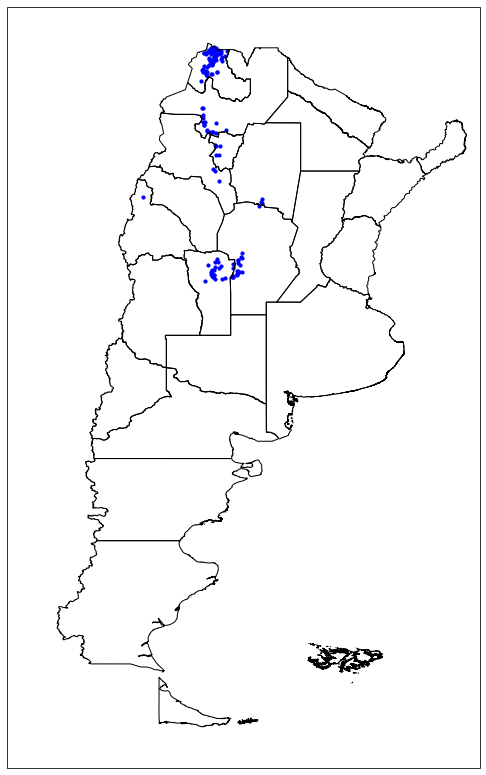

In [16]:
# Vamos a crear nuestro mapa, por lo que necesitamos importar las librarías correspondientes
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader as sf
from cartopy.feature import ShapelyFeature as cfeature


# Utilizamos un archivo del Instituto Geográfico Nacional (IGN) con el shape de los límites de provincias
fname = 'provincia.shp'

# Graficamos el mapa de argentina y sus provincias
fig, ax = plt.subplots( 1, 1, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=[12,14])
shape_feature = cfeature(sf(fname).geometries(), ccrs.PlateCarree(), edgecolor='black')
ax.add_feature(shape_feature, facecolor= 'none')

# Defino los ejes (lon min y max, lat min y max) que limitaran nuestro mapa
ax.set_extent([-76, -53, -57, -20])

# Agrego los puntos de anomalías a mi mapa
plt.scatter(x=anomalias["longitud"], y=anomalias["latitud"], color="blue", marker='o', s=10, alpha=1, transform=ccrs.PlateCarree())
plt.show()